In [1]:
%matplotlib widget

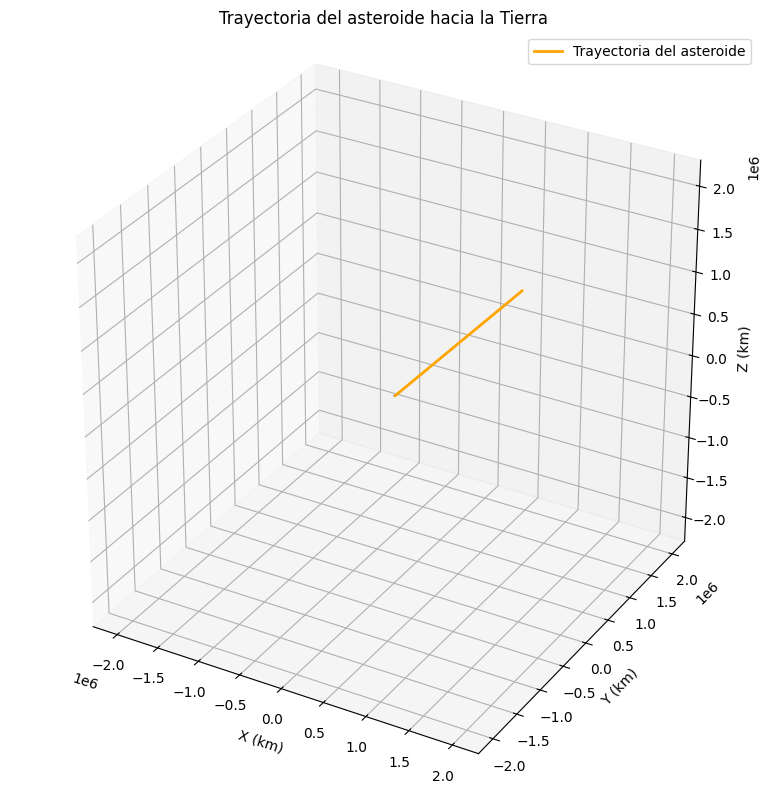

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_impact_from_json(json_path, r_earth_km=6371.0):
    """
    Lee un archivo JSON con la trayectoria del asteroide (formato con x_km, y_km, z_km)
    y grafica la trayectoria en 3D hasta el impacto con la Tierra.
    """
    # --- Cargar datos ---
    with open(json_path, "r") as f:
        data = json.load(f)

    trajectory_raw = data["trajectory"]
    impact = data.get("impact", False)
    impact_details = data.get("impact_details", {})
    if impact:
        impact_time = impact_details.get("impact_time_s", None)
        impact_speed = impact_details.get("impact_speed_km_s", None)
        impact_energy = impact_details.get("impact_energy_megatons", None)

    # --- Extraer coordenadas ---
    x = [p["x_km"] for p in trajectory_raw]
    y = [p["y_km"] for p in trajectory_raw]
    z = [p["z_km"] for p in trajectory_raw]
    r = [p["r_km"] for p in trajectory_raw]

    trajectory = np.column_stack((x, y, z))

    # --- Preparar gráfico ---
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Trayectoria
    ax.plot(x, y, z, color="orange", linewidth=2, label="Trayectoria del asteroide")

    # Tierra (esfera)
    u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
    xe = r_earth_km * np.cos(u) * np.sin(v)
    ye = r_earth_km * np.sin(u) * np.sin(v)
    ze = r_earth_km * np.cos(v)
    ax.plot_surface(xe, ye, ze, color="blue", alpha=0.4, linewidth=0)

    # Punto de impacto
    if impact:
        impact_point = trajectory[-1]
        ax.scatter(*impact_point, color="red", s=80, label="Impacto")
        info = (
            f"Tiempo: {impact_time:.1f} s\n"
            f"Velocidad: {impact_speed:.2f} km/s\n"
            f"Energía: {impact_energy:.3f} Mt"
        )
        ax.text(
            impact_point[0]*1.05,
            impact_point[1]*1.05,
            impact_point[2]*1.05,
            info,
            color="red",
            fontsize=9,
            ha="left"
        )

    # Escalado automático
    max_range = np.max(np.linalg.norm(trajectory, axis=1)) * 1.1
    for axis in "xyz":
        getattr(ax, f"set_{axis}lim")([-max_range, max_range])
    ax.set_box_aspect([1, 1, 1])

    # Etiquetas y formato
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    ax.set_zlabel("Z (km)")
    ax.set_title("Trayectoria del asteroide hacia la Tierra")
    ax.legend()
    plt.tight_layout()
    plt.show()



plot_impact_from_json("impact_trajectory.json")